In [1]:
import numpy as np
import pandas as pd
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import re
from os.path import dirname

In [2]:
curr_path = dirname(os.getcwd())
table_path = curr_path + '/clean_data'

In [3]:
file_list = os.listdir(table_path)
file_list = [table_path + '/' + i for i in file_list]
file_list

['/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/vr_12_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/perceived_stress_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/piazza_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/big_five_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/loneliness_scale_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/psqi_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/grades_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/panas_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/studentstress/clean_data/deadlines_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/studentStress/stu

In [29]:
deadlines_df = pd.read_csv(file_list[1], index_col=0)
flourishing_df = pd.read_csv(file_list[2], index_col = 0)
grades_df = pd.read_csv(file_list[3], index_col = 0)
loneliness_df = pd.read_csv(file_list[4], index_col = 0)
panas_df = pd.read_csv(file_list[5], index_col = 0)
stress_df = pd.read_csv(file_list[6], index_col = 0)
phq_9 = pd.read_csv(file_list[7], index_col = 0)
piazza_df = pd.read_csv(file_list[8], index_col = 0)
psqi_df = pd.read_csv(file_list[9], index_col = 0)
vr_12_df = pd.read_csv(file_list[10], index_col = 0)
big_5_df = pd.read_csv(file_list[0], index_col = 0)

With this function we are going to be merging based on uid on their perspective before and after taking the exam.
We take the difference in their moods. If the difference for one student over the past year is negative, then their outlook on themselves has changed toward a more pessimistic side. On the other hand, if the difference between post and pre values is positive, this indicates that their outlook is more positive than it was initially

In [30]:
#split the data
def merge_by_uid(dataset):
    uids = []
    difference_over_quarter = []
    big_five_pre = dataset[dataset["type"] == "pre"]
    big_five_post = dataset[dataset["type"] == "post"]
    concat_big_five = dataset.iloc[990:]
    for i in range(60):
        if len(str(i)) == 1:
            uid = "u0" + str(i)
        else:
            uid = "u" + str(i)
        try:
            pre_row_by_uid = big_five_pre.loc[uid].tolist()
            post_row_by_uid = big_five_post.loc[uid].tolist()

            difference = 0
            for i in range(len(pre_row_by_uid)):
                if not isinstance(pre_row_by_uid[i],str):
                    difference += post_row_by_uid[i]-pre_row_by_uid[i]
            difference_over_quarter.append(difference)
            uids.append(uid)
        except:
#             print("no two reportings for uid" + str(uid))
            uids.append(uid)
            difference_over_quarter.append(None)
            pass


    return pd.DataFrame({'uid':uids, 'Difference_over_quarter':difference_over_quarter})            

In [31]:
big_5_df_to_merge = big_5_df.set_index("uid")

In [44]:
stress_change = merge_by_uid(big_5_df_to_merge)
# stress_change[stress_change["Difference_over_quarter"].isNan()]
stress_change_parsed = stress_change.dropna()
stress_change_parsed

,uid,Difference_over_quarter
0,u00,1.0
1,u01,-2.0
2,u02,-4.0
3,u03,0.0
4,u04,0.0
5,u05,-2.0
7,u07,-6.0
9,u09,-2.0
10,u10,4.0
14,u14,-1.0


In [57]:
student1 = big_5_df.apply(lambda x: x.tolist(), axis=1)[0]
student1


37

In [194]:
def get_coord(difference_list, question_matrix, uid, questionNum):
    y_coord = difference_list[difference_list["uid"] == uid]["Difference_over_quarter"].tolist()
    found = False
    for i in range(len(question_matrix)):
        if question_matrix[i][0] == uid:
            student = question_matrix[i]
            found = True
            break
    if not found or len(y_coord) < 1:
        return None
    return [ student[questionNum],y_coord[0]]


get_coord(stress_change_parsed, [student1], "u00", 2)

[2, 1.0]

In [214]:
#form question matrix
def form_matrix(df):
    question_matrx = []
    for i in range(df.shape[0]):
        question_matrx.append(df.apply(lambda x: x.tolist(), axis=1)[i])
    return question_matrx
question_matrx_big_5 = form_matrix(big_5_df)
question_matrx_big_5

[['u00', 'pre', 2, 3, 3, 4, 4, 2, 2, 4.0, 3, 2, 2, 2, 1, 2],
 ['u01', 'pre', 3, 3, 3, 4, 4, 2, 2, 4.0, 3, 3, 2, 1, 2, 4],
 ['u02', 'pre', 1, 3, 3, 2, 4, 4, 3, 4.0, 4, 2, 1, 0, 2, 3],
 ['u03', 'pre', 2, 3, 3, 4, 4, 3, 3, 4.0, 3, 3, 2, 1, 3, 1],
 ['u04', 'pre', 2, 3, 3, 4, 4, 3, 3, 4.0, 3, 3, 1, 0, 3, 2],
 ['u05', 'pre', 3, 3, 3, 4, 4, 4, 4, 4.0, 4, 4, 1, 0, 2, 2],
 ['u07', 'pre', 1, 3, 3, 4, 4, 3, 4, 4.0, 3, 2, 2, 1, 1, 4],
 ['u08', 'pre', 2, 3, 3, 4, 4, 3, 3, 3.0, 2, 2, 2, 1, 1, 1],
 ['u09', 'pre', 3, 3, 3, 4, 4, 4, 4, 4.0, 3, 4, 1, 0, 2, 1],
 ['u10', 'pre', 2, 3, 3, 4, 4, 3, 3, 3.0, 2, 2, 3, 0, 2, 3],
 ['u12', 'pre', 3, 3, 3, 4, 4, 4, 4, 4.0, 3, 4, 1, 0, 2, 2],
 ['u13', 'pre', 1, 3, 3, 4, 3, 3, 3, 4.0, 1, 1, 2, 2, 2, 4],
 ['u14', 'pre', 3, 3, 3, 3, 2, 4, 4, 4.0, 4, 5, 0, 0, 3, 3],
 ['u15', 'pre', 2, 3, 3, 4, 4, 2, 3, 4.0, 2, 2, 2, 0, 3, 2],
 ['u16', 'pre', 1, 3, 3, 4, 4, 2, 3, 4.0, 2, 3, 3, 2, 3, 3],
 ['u17', 'pre', 1, 3, 3, 2, 4, 3, 2, 3.0, 2, 2, 1, 0, 2, 3],
 ['u18', 'pre', 1, 3, 1,

In [216]:
def correlation_question(question_matrx, questionNum):
    points_to_plot = []
    for i in range(60):
        uid = str(i)
        if len(uid)<2:
            uid = "0" + uid
        uid = "u" + uid
        x_y = get_coord(stress_change_parsed, question_matrx, uid, questionNum)
        if x_y == None:
            continue
        else:
            points_to_plot.append(x_y)
    return points_to_plot
    

In [217]:
correlation_question(question_matrx_big_5, 4)

[[3, 1.0],
 [3, -2.0],
 [3, -4.0],
 [3, 0.0],
 [3, 0.0],
 [3, -2.0],
 [3, -6.0],
 [3, -2.0],
 [3, 4.0],
 [3, -1.0],
 [3, 0.0],
 [3, -10.0],
 [3, -16.0],
 [1, 3.0],
 [3, -4.0],
 [1, -2.0],
 [1, 0.0],
 [3, 8.0],
 [3, -15.0],
 [3, -2.0],
 [1, 13.0],
 [3, -8.0],
 [3, 0.0],
 [3, 0.0],
 [1, 4.0],
 [3, 4.0],
 [1, 0.0],
 [1, 4.0],
 [3, -1.0],
 [3, 5.0],
 [3, -1.0],
 [1, 6.0],
 [3, 1.0],
 [3, -6.0],
 [3, -11.0],
 [3, 3.0],
 [3, -1.0]]

In [198]:
big_5_df.columns[2:]

Index(['In general, would you say your health is',
       'Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?',
       'Climbing several flights of stairs?',
       'Accomplished less than you would like.',
       'Were limited in the kind of work or other activities.',
       'Accomplished less than you would like..1',
       'Didn't do work or other activities as carefully as usual.',
       'During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?',
       'How much of the time during the past 4 weeks: Have you felt calm and peaceful?',
       'How much of the time during the past 4 weeks: Did you have a lot of energy?',
       'How much of the time during the past 4 weeks: Have you felt downhearted and blue?',
       'During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with

In [218]:
def plot_for_question(dataframe,questionNum):
    question_matrx = form_matrix(dataframe)
    points = correlation_question(question_matrx, questionNum)
    pd.DataFrame(points,columns=['Question #' + str(questionNum),'StessIncrease']).plot.scatter(y = 'StessIncrease', x = 'Question #' + str(questionNum))

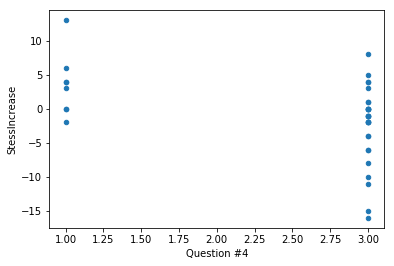

In [220]:
plot_for_question(big_5_df,4)

In [221]:
# for i in range(2, len(big_5_df.columns)):
#     plot_for_question(i)

Through this part of EDA, we can see that there does not seem to be any correlation between how a student initially a question and how stressed they are. 

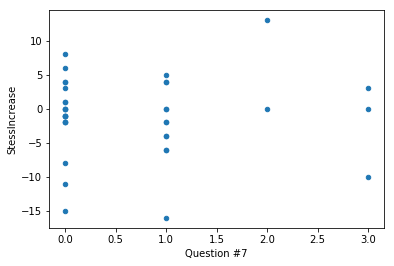

In [223]:
plot_for_question(vr_12_df,7)